In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from collections import Counter
from sklearn.model_selection import train_test_split
import re

In [2]:
# Read the train and test data
train_path = "customer_service/main/train.csv"
test_path =  "customer_service/main/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [3]:
# Check the train data
print(df_train.head())

                  issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reasons for being asked...            neutral   
2  Replacement an

In [4]:
# Check the test data
print(df_test.head())

                  issue_area                         issue_category  \
0                   Shopping                  Pricing and Discounts   
1          Login and Account  Account Reactivation and Deactivation   
2  Cancellations and returns         Cash on Delivery (CoD) Refunds   
3                      Order                  Order Delivery Issues   
4  Cancellations and returns                    Pickup and Shipping   

                               issue_sub_category  \
0               Discounts through exchange offers   
1                Reactivating an inactive account   
2  Refund timelines for Cash on Delivery  returns   
3  Package shows as delivered but cannot be found   
4     Reimbursement of courier charges for return   

                         issue_category_sub_category customer_sentiment  \
0  Pricing and Discounts -> Discounts through exc...           negative   
1  Account Reactivation and Deactivation -> React...           negative   
2  Cash on Delivery (CoD) Ref

In [5]:
# Check the column names and number of rows and columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   970 non-null    object
 1   issue_category               970 non-null    object
 2   issue_sub_category           970 non-null    object
 3   issue_category_sub_category  970 non-null    object
 4   customer_sentiment           970 non-null    object
 5   product_category             970 non-null    object
 6   product_sub_category         970 non-null    object
 7   issue_complexity             970 non-null    object
 8   agent_experience_level       970 non-null    object
 9   agent_experience_level_desc  970 non-null    object
 10  conversation                 970 non-null    object
dtypes: object(11)
memory usage: 83.5+ KB


In [6]:
# Check the column names and number of rows and columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   30 non-null     object
 1   issue_category               30 non-null     object
 2   issue_sub_category           30 non-null     object
 3   issue_category_sub_category  30 non-null     object
 4   customer_sentiment           30 non-null     object
 5   product_category             30 non-null     object
 6   product_sub_category         30 non-null     object
 7   issue_complexity             30 non-null     object
 8   agent_experience_level       30 non-null     object
 9   agent_experience_level_desc  30 non-null     object
 10  conversation                 30 non-null     object
dtypes: object(11)
memory usage: 2.7+ KB


In [7]:
# Check for missing values in the train data
df_train.isnull().sum()

issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64

In [8]:
# Check for missing values in the test data
df_test.isnull().sum()

issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64

In [9]:
# Check for duplicated rows in the train data
df_train.duplicated().sum()

0

In [10]:
# Check for duplicated rows in the test data
df_test.duplicated().sum()

0

In [11]:
# Check for statistics in the train data
df_train.describe()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
count,970,970,970,970,970,970,970,970,970,970,970
unique,6,40,109,109,3,3,50,3,3,3,968
top,Cancellations and returns,Return and Exchange,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Water Purifier,less,junior,"handles customer inquiries independently, poss...","Agent: You're welcome, Jane. Have a great day!"
freq,277,92,17,17,542,454,26,472,490,490,3


In [12]:
# Check for statistics in the test data
df_test.describe()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
count,30,30,30,30,30,30,30,30,30,30,30
unique,6,16,22,22,3,3,21,3,3,3,30
top,Order,Order Confirmation and Status,Confirming order status,Order Confirmation and Status -> Confirming or...,negative,Appliances,Vacuum Cleaner,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
freq,12,6,5,5,10,11,3,16,17,17,1


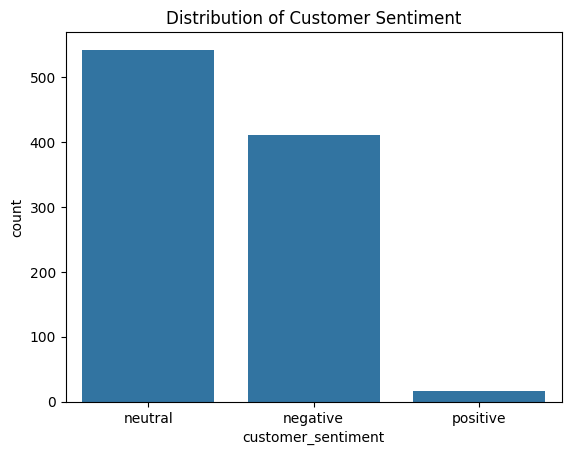

customer_sentiment
neutral     0.558763
negative    0.423711
positive    0.017526
Name: proportion, dtype: float64

In [13]:
# Sentiment distribution in the training data
sns.countplot(data=df_train, x='customer_sentiment')
plt.title('Distribution of Customer Sentiment')
plt.show()

df_train['customer_sentiment'].value_counts(normalize=True)

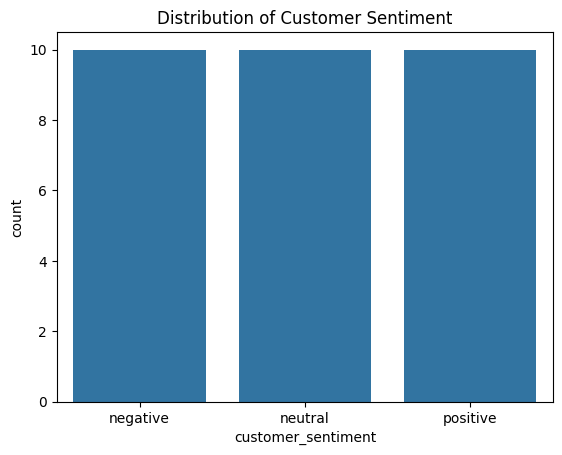

customer_sentiment
negative    0.333333
neutral     0.333333
positive    0.333333
Name: proportion, dtype: float64

In [14]:
# Sentiment distribution in the test data
sns.countplot(data=df_test, x='customer_sentiment')
plt.title('Distribution of Customer Sentiment')
plt.show()

df_test['customer_sentiment'].value_counts(normalize=True)

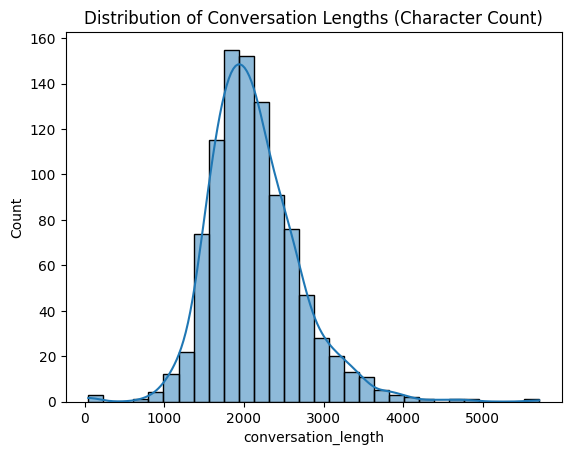

In [15]:
# Visualization of the length of the conversations in the train data
df_train['conversation_length'] = df_train['conversation'].apply(len)
sns.histplot(df_train['conversation_length'], bins=30, kde=True)
plt.title('Distribution of Conversation Lengths (Character Count)')
plt.show()

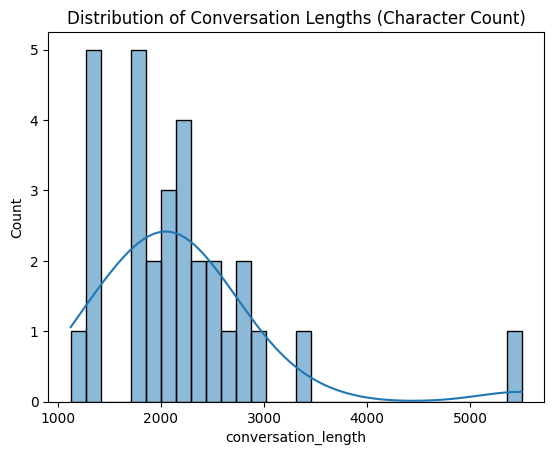

In [16]:
# Visualization of the length of the conversations in the test data
df_test['conversation_length'] = df_test['conversation'].apply(len)
sns.histplot(df_test['conversation_length'], bins=30, kde=True)
plt.title('Distribution of Conversation Lengths (Character Count)')
plt.show()

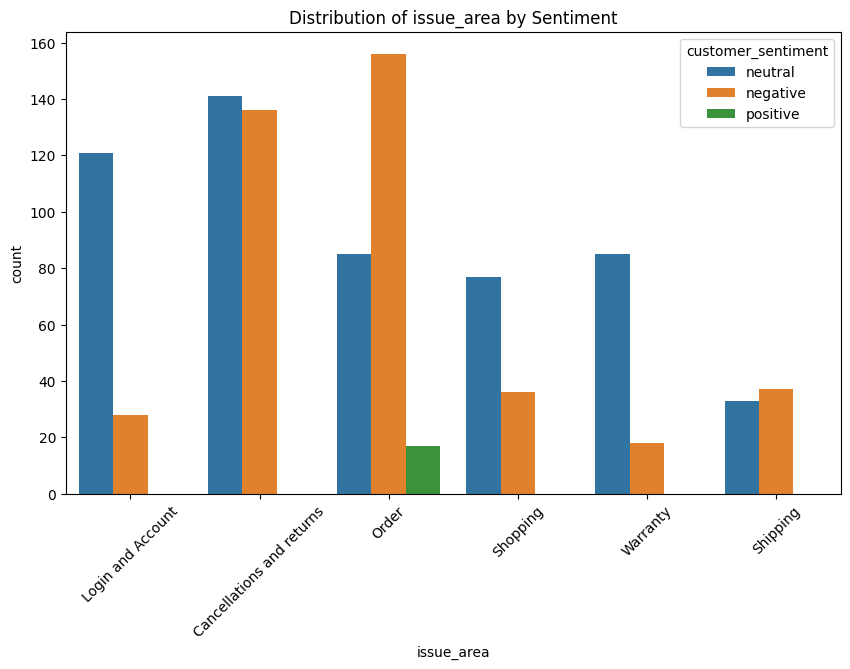

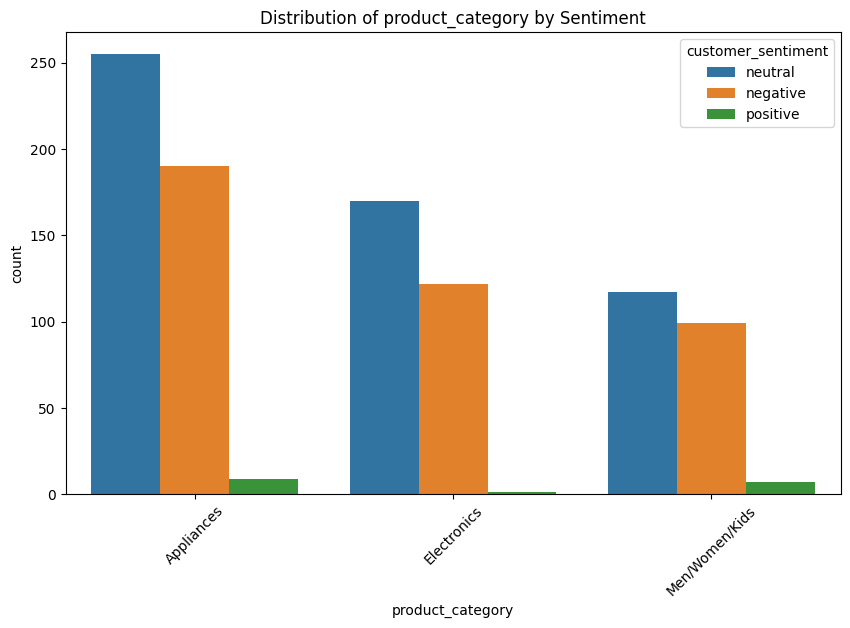

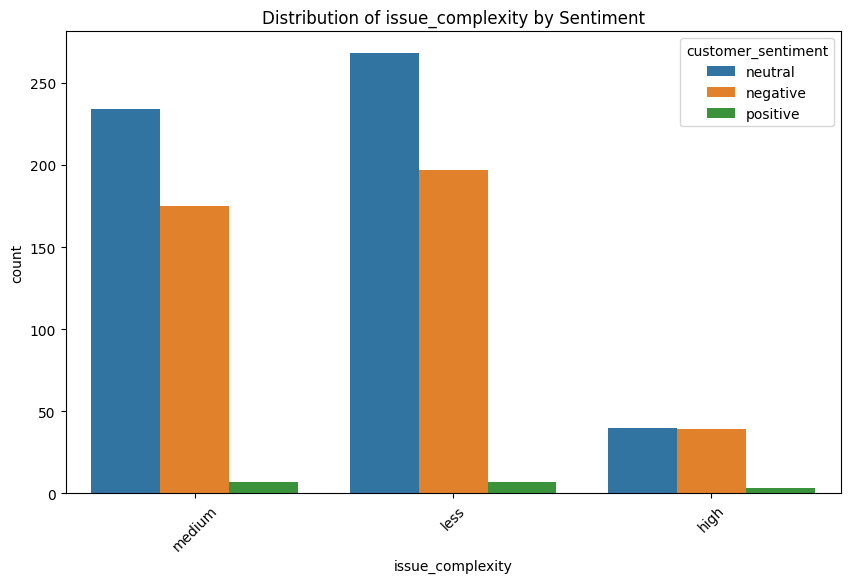

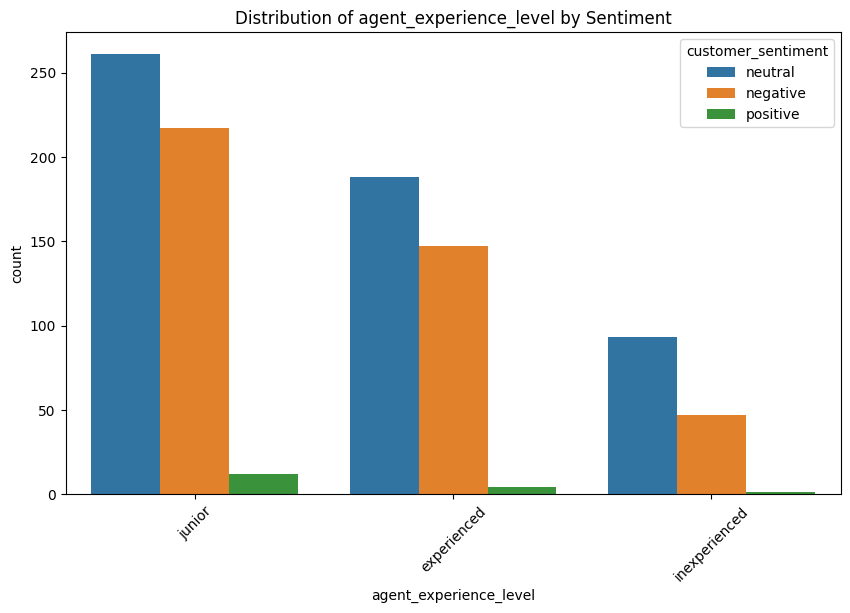

In [17]:
# Visualize distribution of other categorical features with respect to sentiment
categorical_columns = ['issue_area', 'product_category', 'issue_complexity', 'agent_experience_level']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, x=col, hue='customer_sentiment')
    plt.title(f'Distribution of {col} by Sentiment')
    plt.xticks(rotation=45)
    plt.show()

In [18]:
# Function to perform chi-square test for each categorical column to see whether there are correlations between the categorical features and the customer_sentiment
def chi_square_test(col):
    contingency_table = pd.crosstab(df_train[col], df_train['customer_sentiment'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

chi2_results = {}
for col in categorical_columns:
    chi2_results[col] = chi_square_test(col)

chi2_results

{'issue_area': (168.89324953445222, 4.701404799126131e-31),
 'product_category': (6.90616061572619, 0.14093108779287314),
 'issue_complexity': (3.300219233409547, 0.5088975229960726),
 'agent_experience_level': (9.259812544746723, 0.05492352706636956)}

Considering the results, there seems to be a significant relationship between issue_area and customer_sentiment. There is an almost significant relation between agent_experience_level and customer_sentiment since the p_value is so close to 0.05. There seems no significant relation between customer_sentiment and product_category and issue_complexity.

In [19]:
# Finding the most frequent words across all conversations and their counts
text = " ".join(df_train['conversation'])

# Count the frequency of each word
word_counts = Counter(text.split())

# Print the 10 most common words and their counts
most_common_words = word_counts.most_common(15)
print("Most 10 frequent words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most 10 frequent words:
the: 15406
you: 13104
I: 13066
for: 9990
to: 9642
Agent:: 8807
Customer:: 7855
your: 7622
and: 6917
a: 6011
is: 4586
Thank: 4467
that: 4007
with: 3926
can: 3837


In [20]:
# Selecting the relevant columns for the sentiment-analysis task, splitting the train data into training and validation, and saving the new train-val-test data files.
df_train_final = df_train[['conversation', 'customer_sentiment']]
df_test_final = df_test[['conversation', 'customer_sentiment']]

X_train, X_val, y_train, y_val = train_test_split(
    df_train_final['conversation'], df_train_final['customer_sentiment'], 
    test_size=0.2, random_state=42, stratify=df_train['customer_sentiment'])

df_train_final = pd.DataFrame({'conversation': X_train, 'customer_sentiment': y_train})
df_val_final = pd.DataFrame({'conversation': X_val, 'customer_sentiment': y_val})

df_train_final.to_csv("customer_service/conversationOnly/train_final.csv", index=False)
df_val_final.to_csv("customer_service/conversationOnly/val_final.csv", index=False)
df_test_final.to_csv("customer_service/conversationOnly/test_final.csv", index=False)

C:\Users\iedev\AppData\Local\Temp\ipykernel_25904\3265157708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final.loc[:, 'conversation_length'] = df_test_final['conversation'].apply(len)


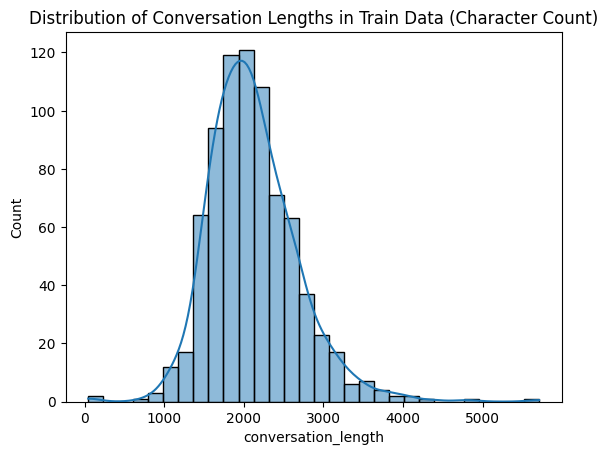

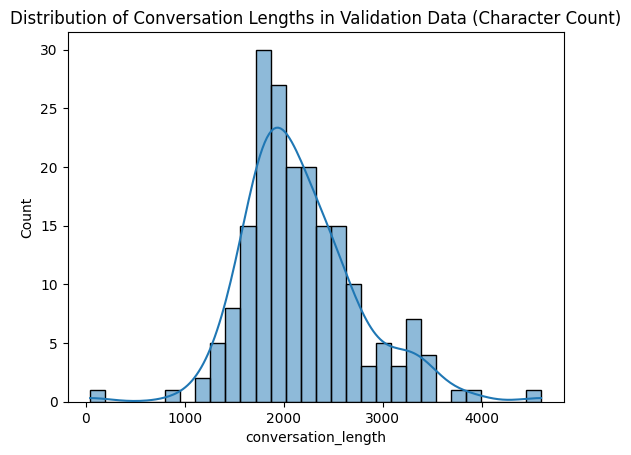

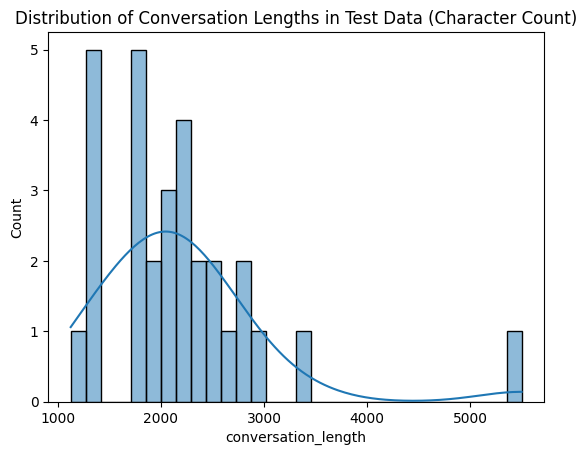

In [21]:
df_train_final.loc[:, 'conversation_length'] = df_train_final['conversation'].apply(len)
df_val_final.loc[:, 'conversation_length'] = df_val_final['conversation'].apply(len)
df_test_final.loc[:, 'conversation_length'] = df_test_final['conversation'].apply(len)

# Visualization of the length of the conversations in the new train data
sns.histplot(df_train_final['conversation_length'], bins=30, kde=True)
plt.title('Distribution of Conversation Lengths in Train Data (Character Count)')
plt.show()

# Visualization of the length of the conversations in the validation data
sns.histplot(df_val_final['conversation_length'], bins=30, kde=True)
plt.title('Distribution of Conversation Lengths in Validation Data (Character Count)')
plt.show()

# Visualization of the length of the conversations in the test data
sns.histplot(df_test_final['conversation_length'], bins=30, kde=True)
plt.title('Distribution of Conversation Lengths in Test Data (Character Count)')
plt.show()


In [22]:
# Preprocessing data
def order_number_pattern(sentence):
    order_pattern = r'\bbb\d+\b'
    return re.search(order_pattern, sentence)

def preprocess_conversation(text):
    # Lowercase the entire text
    text = text.lower()
    
    # Remove any text within square brackets and parentheses
    text = re.sub(r'\[[^\]]*\]', '', text)
    text = re.sub(r'\([^)]*\)', '', text)
    
    # Split the conversation into lines
    lines = text.split("\n")
    
    # Keep only the lines that start with "customer:"
    customer_lines = [line for line in lines if line.strip().startswith("customer:")]
    
    # Remove empty lines and trim each line
    customer_lines = [line.strip() for line in customer_lines if line.strip()]
    
    # Delete "customer:" headings from the remaining lines
    customer_lines = [line.replace("customer: ", "") for line in customer_lines]
    
    # Delete sentences that contain order numbers
    customer_lines = [line for line in customer_lines if not order_number_pattern(line)]
    
    # Combine the processed lines back into a single string.
    return " ".join(customer_lines)

# Example
conversation = """Agent: Thank you for contacting BrownBox customer support. My name is John. How can I assist you today?

Customer: Hi John. I have been trying to order a refrigerator from your website, but it's not available for shipping to my location. Can you help me with this?

Agent: I'm sorry to hear that, sir. May I have your location, please?

Customer: Yes, I am in New York.

Agent: Thank you, sir. I apologize for the inconvenience, but due to some logistic issues, we are unable to ship refrigerators to New York currently. However, we have other products available for shipping to your location. May I suggest some alternatives?

Customer: No, I specifically want a refrigerator. This is unacceptable. Why can't you ship it to New York?

Agent: I understand your frustration, sir. Unfortunately, we are experiencing some issues with our shipping partners, which is causing a delay in delivering certain products to some locations. We are working to resolve this as soon as possible.

Customer: This is ridiculous. I need a refrigerator urgently. Can't you make an exception for me?

Agent: I'm sorry, sir, but we are unable to make an exception in this case. However, I can suggest some local stores in your area where you may be able to purchase a refrigerator.

Customer: I don't have time for that. This is a waste of my time. I want to speak to your manager.

Agent: I apologize for the inconvenience, sir. I will transfer your call to my manager, who will be able to assist you better. Please hold the line.

(Customer is on hold for a few minutes)

Manager: Hi, this is Mark. How can I assist you today?

Customer: Hi Mark. I am really disappointed with your service. I want to order a refrigerator, but your agent informed me that it's not available for shipping to my location.

Manager: I'm sorry to hear that, sir. May I have your location, please?

Customer: I am in New York.

Manager: Yes, sir. I understand the issue. As my colleague informed you, we are experiencing some issues with our shipping partners, which is causing a delay in delivering certain products to some locations. However, I can assure you that we are working to resolve this as soon as possible.

Customer: This is unacceptable. I need a refrigerator urgently.

Manager: I understand your urgency, sir. However, as of now, we are unable to ship refrigerators to your location. I can suggest some local stores in your area where you may be able to purchase a refrigerator.

Customer: I don't have time for that. This is a waste of my time. I am never going to order anything from your website again.

Manager: I apologize for the inconvenience, sir. I understand your frustration, but please know that we are doing everything we can to resolve this issue. Is there anything else I can assist you with?

Customer: No, that's all. Goodbye.

Manager: I'm sorry to hear that, sir. Thank you for your time. Goodbye.,negative"""
    
processed_text = preprocess_conversation(conversation)
print(processed_text)

hi john. i have been trying to order a refrigerator from your website, but it's not available for shipping to my location. can you help me with this? yes, i am in new york. no, i specifically want a refrigerator. this is unacceptable. why can't you ship it to new york? this is ridiculous. i need a refrigerator urgently. can't you make an exception for me? i don't have time for that. this is a waste of my time. i want to speak to your manager. hi mark. i am really disappointed with your service. i want to order a refrigerator, but your agent informed me that it's not available for shipping to my location. i am in new york. this is unacceptable. i need a refrigerator urgently. i don't have time for that. this is a waste of my time. i am never going to order anything from your website again. no, that's all. goodbye.


This preprocessing approach focuses on cleaning and structuring the text to highlight relevant customer feedback while removing noise. It standardizes the content by lowercasing the text, which is a standard practice in NLP to reduce variations due to case sensitivity. The filtration ensures that the analysis remains focused on the customer's sentiments, which are the primary target for sentiment analysis. Removing text within square brackets and parentheses eliminates non-conversational elements (for example, agent's side interactions) that could distract from the emotional tone. Excluding order numbers removes irrelevant details that do not contribute to sentiment, such as logistical information. In conclusion, this preprocessing method isolates the customer’s expressed emotions, making the sentiment signal clearer and enhancing the accuracy of the sentiment analysis.

In [23]:
# Applying preprocessing to new train-val-test files and saving them to another location

df_train_final = pd.read_csv("customer_service/conversationOnly/train_final.csv")
df_val_final = pd.read_csv("customer_service/conversationOnly/val_final.csv")
df_test_final = pd.read_csv("customer_service/conversationOnly/test_final.csv")

df_train_final['conversation'] = df_train_final['conversation'].apply(preprocess_conversation)
df_val_final['conversation'] = df_val_final['conversation'].apply(preprocess_conversation)
df_test_final['conversation'] = df_test_final['conversation'].apply(preprocess_conversation)

df_train_final.to_csv("customer_service/preprocessed/prep_train_final.csv", index=False)
df_val_final.to_csv("customer_service/preprocessed/prep_val_final.csv", index=False)
df_test_final.to_csv("customer_service/preprocessed/prep_test_final.csv", index=False)

df_val_final

,conversation,customer_sentiment
0,"hi, i need to change the email id linked to my...",neutral
1,"hi john, i recently purchased a dishwasher fro...",neutral
2,"hi sarah, i recently purchased an air cooler f...",neutral
3,"hi, i need to change the address for item pick...",negative
4,"hi, sarah. i received a water purifier yesterd...",negative
...,...,...
189,"hi, i placed an order for a pair of sunglasses...",negative
190,"hi, i placed an order for a pair of shorts las...",negative
191,"hi rachel, i am trying to log in to my account...",neutral
192,"hi sarah, i am having trouble logging into my ...",neutral


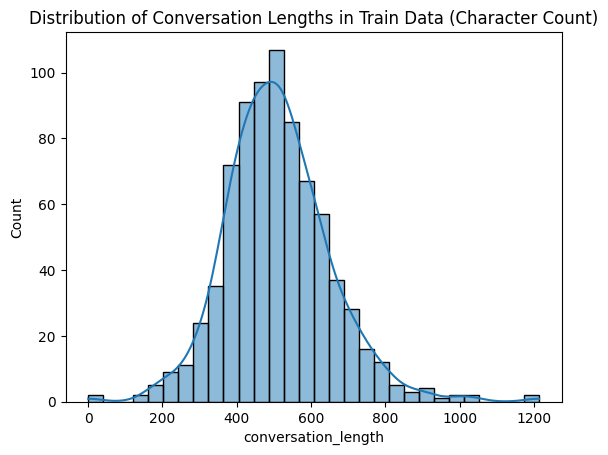

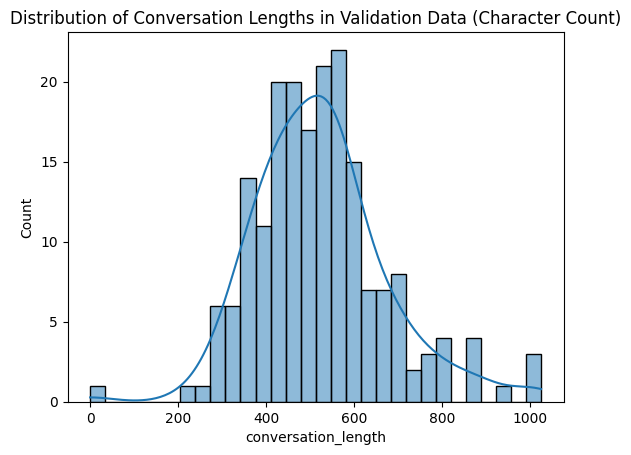

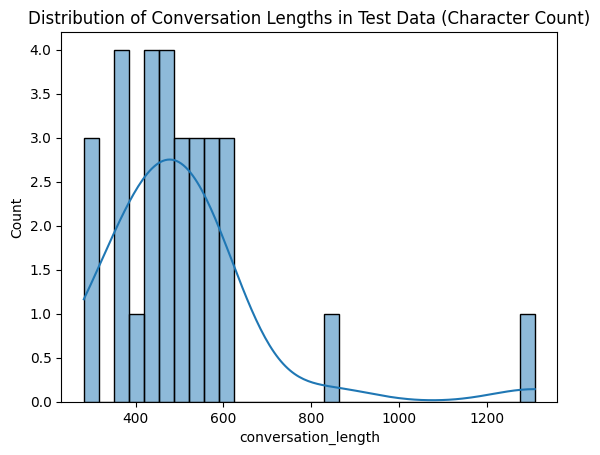

In [24]:
df_train_final.loc[:, 'conversation_length'] = df_train_final['conversation'].apply(len)
df_val_final.loc[:, 'conversation_length'] = df_val_final['conversation'].apply(len)
df_test_final.loc[:, 'conversation_length'] = df_test_final['conversation'].apply(len)

# Visualization of the length of the conversations in the preprocessed train data
sns.histplot(df_train_final['conversation_length'], bins=30, kde=True)
plt.title('Distribution of Conversation Lengths in Train Data (Character Count)')
plt.show()

# Visualization of the length of the conversations in the preprocessed validation data
sns.histplot(df_val_final['conversation_length'], bins=30, kde=True)
plt.title('Distribution of Conversation Lengths in Validation Data (Character Count)')
plt.show()

# Visualization of the length of the conversations in the preprocessed test data
sns.histplot(df_test_final['conversation_length'], bins=30, kde=True)
plt.title('Distribution of Conversation Lengths in Test Data (Character Count)')
plt.show()

This approach seems to reduce most of the characters in all data files in the sense that it will significantly shorten the text sequences while preserving essential customer sentiment information. This reduction is particularly necessary for NanoGPT training and GPT-2 fine-tuning because these models have token length constraints, and excessive text could lead to inefficient training or truncation. By filtering out irrelevant content, such as agent responses, headings, and order numbers, the dataset becomes more focused on customer expressions of sentiment.